In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

## 1차원 데이터
- 평균값(기댓값), 표본분산, 불편분산(ddof=1), 표준편차
- 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며 그 경향을 없애기 위한 것이 불편분산임. 표본분산 보다 조금 큰 값이 된다.
- 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향 분산
    - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재
    - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아진다.
    - 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
    - 통계학에서는 이 비편향분산ㅇ르 사용하는 경우가 많다.
    - 불편분산은 n대신 n-1로 나누어 구할 수 있다.
    
[표분분산이 분산을 과소 평가하는 이유]

- 호수안에 물고기가 7마리가 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링1 3마리{1,2,3} 표본평균 2, 샘플링2 {5,6,7} 표본평균 6
- 이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편분산을 구할 수 있다.

In [2]:
df = pd.read_csv('./ch2_scores_em.csv',index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [3]:
df.shape

(50, 2)

In [4]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [5]:
scores_df = pd.DataFrame({'score':scores},index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


## 1차원 데이터 정리

### 데이터 중심의 지표

#### 평균값

In [6]:
sum(scores)/len(scores)

55.000

In [7]:
np.mean(scores)

55.000

In [8]:
scores_df.mean()

score    55.0
dtype: float64

#### 중앙값

In [9]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [10]:
n = len(sorted_scores)
if n % 2 ==0:
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0+m1)/2
else:
    median = sorted_scores[(n+1)//2-1]
median

56.500

In [11]:
np.median(scores)

56.500

In [12]:
scores_df.median()

score    56.5
dtype: float64

#### 최빈값

In [13]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [14]:
pd.Series([1,2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

### 데이터의 산포도 지표

#### 분산과 표준편차

In [15]:
mean = np.mean(scores)
deviation = scores-mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [16]:
another_scores = [50,60,58,54,51,56,57,53,52,59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [17]:
np.mean(deviation)

0.000

In [18]:
np.mean(another_deviation)

0.000

In [19]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [20]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

In [21]:
np.mean(deviation ** 2)

86.000

In [22]:
np.var(scores)

86.000

In [23]:
scores_df.var()

score    95.555556
dtype: float64

In [24]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [25]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [26]:
np.sqrt(np.var(scores,ddof=0))

9.274

In [27]:
np.std(scores,ddof=0)

9.274

#### 범위와 사분위 범위

In [28]:
np.max(scores) - np.min(scores)

28

In [29]:
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

#### 데이터의 지표 정리

In [32]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

#### 0822 [과제] 교재 ~p.51 코드 문제 풀기

#### 0822 [과제] 20개 원소로 구성되는 배열을 만든 후, 평균, 편차 및 편차의 합을 구하세요.

In [40]:
import random
arr1 = np.random.randint(100,size=20)
arr1

array([ 4, 42, 32, 53, 80, 26, 25, 37, 85, 69, 25, 19, 52, 79, 65, 79, 41,
        5,  7, 97])

In [41]:
arr1.mean()

46.100

In [77]:
deviation = arr1 - arr1.mean()
deviation

array([-42.1,  -4.1, -14.1,   6.9,  33.9, -20.1, -21.1,  -9.1,  38.9,
        22.9, -21.1, -27.1,   5.9,  32.9,  18.9,  32.9,  -5.1, -41.1,
       -39.1,  50.9])

In [48]:
deviation.sum()

0.000

#### 0822 [과제] 중앙값 > 평균값 인 경우와 중앙값 < 평균값인 두가지 집합에서 나타나는 가능성 있는 특징을 사례로 설명하세요.

In [58]:
# 중앙값(median) > 평균값(mean)
# 160~170 사이 비슷한 키를 가진 사람들
arr2 = [168,165,166,162,160,167]
arr2_mean = np.mean(arr2)
arr2_median = np.median(arr2)
print(f'평균값 : {arr2_mean}')
print(f'중앙값 : {arr2_median}')

평균값 : 164.66666666666666
중앙값 : 165.5


In [57]:
# 중앙값(median) < 평균값(mean)
# 월급받는 개발자 5명과, 프리랜서(비교적 고연봉) 1명
arr3 = [250,300,255,210,320,700]
arr3_mean = np.mean(arr3)
arr3_median = np.median(arr3)
print(f'평균값 : {arr3_mean}')
print(f'중앙값 : {arr3_median}')

평균값 : 339.1666666666667
중앙값 : 277.5


#### 0822 [과제]  4분위를 이용하여 이상치를 구하는 사례를 생성하고 시각화 및 이상치 산출하는 과정을 설명하세요.

In [65]:
df_hw = pd.read_csv('./stock_market.csv')
df_hw

,ID,Name,Market,Category,Capital,PER,EPS,ROE,PBR,BPS,...,Retention_Continuous,Open,High,Low,Close,DaytoDay,Volume,Highest_Price,Highest_Date,update_date
0,20,동화약품,KOSPI,제약,3282,22.82,204,5.27,1.16,12534,...,5,11400,11750,11400,11750,300,67692,21550,2020-08-11,2022-05-13 7:04
1,40,KR모터스,KOSPI,자동차,761,-8.77,-48,-25.82,2.25,385,...,1,786,804,786,792,8,80163,1450,2019-07-05,2022-05-13 6:31
2,50,경방,KOSPI,"섬유,의류,신발,호화품",4208,16.92,155,2.98,0.46,30043,...,5,15100,15350,14900,15350,200,8396,17750,2022-04-26,2022-05-13 6:48
3,60,메리츠화재,KOSPI,손해보험,44269,6.13,1605,26.08,1.52,22115,...,4,37250,37350,34650,36700,350,545472,53500,2022-01-21,2022-05-13 7:05
4,70,삼양홀딩스,KOSPI,식품,6988,3.66,1645,14.53,0.43,226314,...,1,81800,82300,81000,81600,500,9234,134000,2021-04-22,2022-05-13 6:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,4920,씨아이테크,KOSPI,컴퓨터와주변기기,429,-8.51,119,-15.91,1.27,1202,...,2,1070,1115,1065,1075,5,272694,2035,2021-04-27,2022-05-13 6:59
246,4960,한신공영,KOSPI,건설,1799,3.75,2254,7.55,0.27,58000,...,5,15800,16050,15550,15550,200,67490,27500,2021-05-10,2022-05-13 6:39
247,4970,신라교역,KOSPI,식품,2016,4.82,556,8.32,0.38,35004,...,5,12500,12600,12400,12600,50,8071,15450,2021-06-11,2022-05-13 6:39
248,4980,성신양회,KOSPI,건축자재,2917,64.89,619,1.57,0.99,16637,...,4,12050,12300,11800,11900,250,256562,20200,2021-12-20,2022-05-13 7:16


<AxesSubplot:>

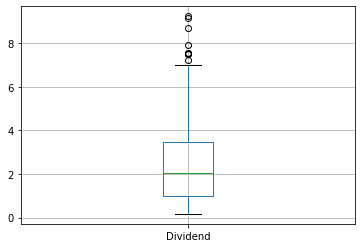

In [67]:
df_hw.boxplot(column=['Dividend'])

In [71]:
Q1 = df_hw[['Dividend']].quantile(q=0.25)
Q3 = df_hw[['Dividend']].quantile(q=0.75)
print(Q1)
print(Q3)

Dividend    1.01
Name: 0.25, dtype: float64
Dividend    3.46
Name: 0.75, dtype: float64


In [72]:
IQR = Q3-Q1
IQR

Dividend    2.45
dtype: float64

In [73]:
IQR_df = df_hw[(df_hw['Dividend'] <= Q3['Dividend']+1.5*IQR['Dividend']) & (df_hw['Dividend'] >= Q1['Dividend']-1.5*IQR['Dividend'])]
IQR_df = IQR_df[['Dividend']]

print('IQR_df :', len(IQR_df))

IQR_df : 180


<AxesSubplot:>

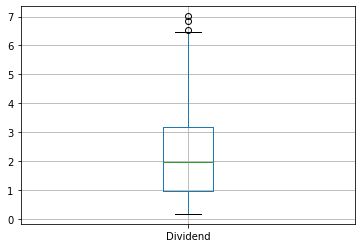

In [74]:
IQR_df.boxplot()

#### 0822 [과제] 표본 분산과 불편 분산의 차이를 사례를 들어 설명하세요.

실제 모분산은 알 수가 없는 경우가 많기 때문에 통계학에서는 표본분산을 많이 사용합니다.

- '불편성'이란 '편하지 않다(不便, incovenience)'라는 뜻이 아니고 '한쪽으로 편중되어 있지 않다(不偏, unbiasedness)'의 뜻으로 
추정량(여기서는 표본분산)의 기대값이 모수(여기서는 모분산)이어야 한다는 성질인데,


- 만약 n-1대신 n으로 나누게 되면 이런 불편추정량으로서의 성질이 없게됨

즉, 표본분산은 모분산의 추정량(estimator)인데, 좋은 추정량으로서 가져야 할 성질 중의 하나가, 불편성(unbiasedness)이고 
표본분산이 불편추정량되기 위해서는  n-1로 나눠 줘야 하는 겁니다.
요약하면, 표본분산에서 n-1로 나누어주는 이유는 n 보다 추정량의 성질이 좋기 때문입니다.

In [103]:
vals = np.random.randint(100,size=50)
mean = sum(vals) / len(vals)

# 표본분산
vsum = 0
for val in vals:
    vsum = vsum + (val - mean)**2
variance = vsum / len(vals)-1
print(f'표본분산 : {variance}')

# 불편분산
vsum1 = 0
for val in vals:
    vsum1 = vsum1 + (val - mean)**2
variance1 = vsum1 / len(vals)
print(f'불편분산 : {variance1}')

print(f'np 분산 : {np.var(vals)}')

표본분산 : 1090.7604000000001
불편분산 : 1091.7604000000001
np 분산 : 1091.7604000000001


08-23 진도

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('./ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [4]:
scores = np.array(df['english'])[:10]

In [5]:
scores_df = pd.DataFrame({'score':scores},index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [7]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [9]:
# 편차값은 평균이 50, 표준편차가 10이 되도록 정규화한 값이다.
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
scores_df['deviation_value'] = z
scores_df

,score,deviation_value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


### 데이터의 정규화

#### 표준화

In [12]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [13]:
np.mean(z),np.std(z,ddof=0)

(-0.000, 1.000)

#### 편찻값

In [15]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [16]:
scores_df['deviation_value'] = z
scores_df

,score,deviation_value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


### 1차원 데이터의 시각화

In [17]:
english_scores = np.array(df['english'])
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

#### 도수분포표

In [18]:
freq,_ = np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [19]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]

freq_dist_df = pd.DataFrame({'frequency':freq},
                           index=pd.Index(freq_class,
                                         name = 'class'))

freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [20]:
# 계급값(중앙값)
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [21]:
# 상대도수 : 전체 데이터에 대해 해당 계급의 데이터가 어느정도 비율을 차지하는지
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [22]:
# 누적상대도수 :해당 계급까지의 상대도수의 합
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [23]:
# 계급값, 상대도수, 누적상대도수를 도수분포표에 추가

freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value','frequency','relative frequency','cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [24]:
# 최빈값
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value']

65

#### 히스토그램

<function matplotlib.pyplot.show(close=None, block=None)>

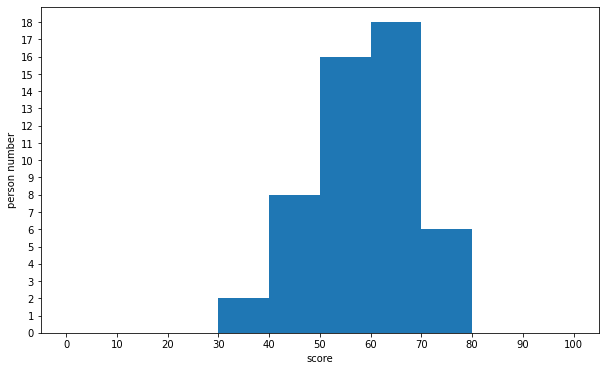

In [26]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111) # 인수는 영역을 1x1개 지정, 하나의 영역에 그림

freq,_,_ = ax.hist(english_scores, bins=10, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

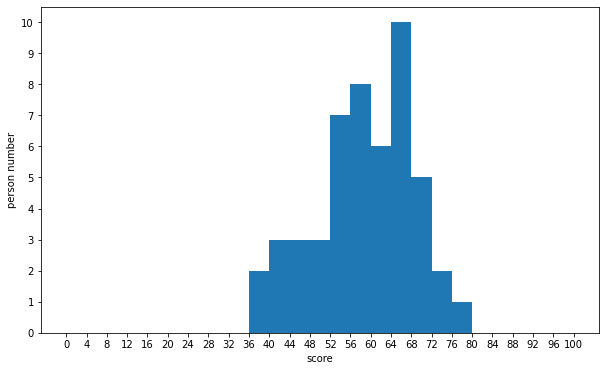

In [27]:
# bins=25 설정
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)

freq,_,_ = ax.hist(english_scores, bins=25, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,25+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

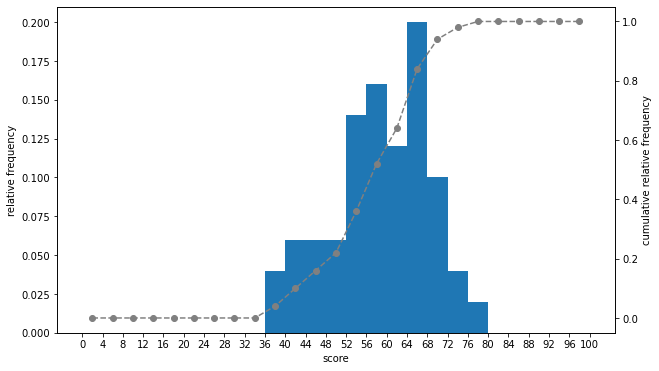

In [28]:
# 상대도수의 히스토그램 , 누적상대도수의 꺾은선 그래프 같이 그리기

fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

weights = np.ones_like(english_scores) / len(english_scores)
rel_freq,_,_ = ax1.hist(english_scores, bins=25, range=(0,100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]

ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')
ax2.grid(visible=False) # 꺾은선 그래프의 눈금 제거

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show

#### 상자그림

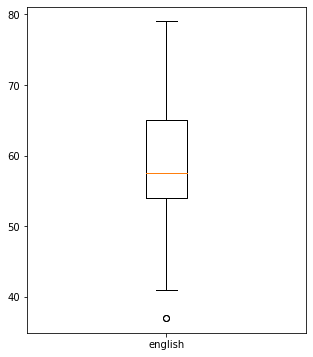

In [29]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()

## 2차원 데이터 정리

In [32]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                         'mathematics':ma_scores},
                        index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                                      name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


### 두 데이터 사이의 관계를 나타내는 지표

#### 공분산

In [35]:
# 부호를 붙인 면적 : 공분산
summary_df = scores_df.copy()
summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()

summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()

summary_df['product of deviations'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']

summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [36]:
# 영어 수학 점수는 양의 상관관계에 있다.
summary_df['product of deviations'].mean()

62.800

In [37]:
# 공분산 행렬, 분산공분산 행렬 cov함수
cov_mat = np.cov(en_scores,ma_scores,ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [38]:
# 영어와 수학의 공분산
cov_mat[0,1], cov_mat[1,0]

(62.800, 62.800)

In [39]:
# 영어와 영어의 공분산, 수학과 수학의 공분산
cov_mat[0,0], cov_mat[1,1]

(86.000, 68.440)

In [40]:
# 영어와 수학의 분산
np.var(en_scores,ddof=0),np.var(ma_scores,ddof=0)

(86.000, 68.440)

#### 상관계수

단위에 의존하지 않는 상관을 나타내는 지표

In [41]:
# 영어와 수학의 상관계수
np.cov(en_scores,ma_scores,ddof=0)[0,1]/\
    (np.std(en_scores) * np.std(ma_scores))

0.819

In [42]:
# 상관행렬 corrcoef
np.corrcoef(en_scores,ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [43]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


### 2차원 데이터의 시각화

#### 산점도

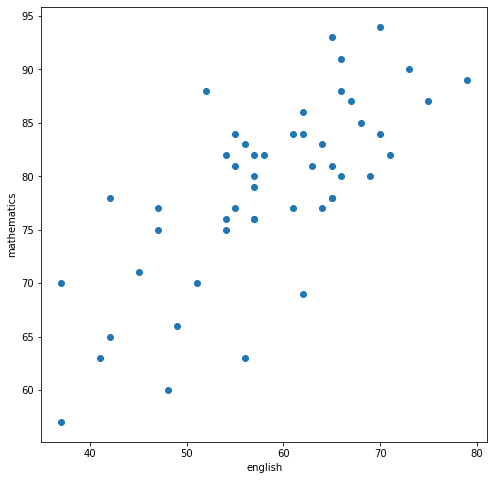

In [44]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.scatter(english_scores,math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

#### 회귀직선

두 데이터 사이의 관계를 더욱 잘 나타내는 직선

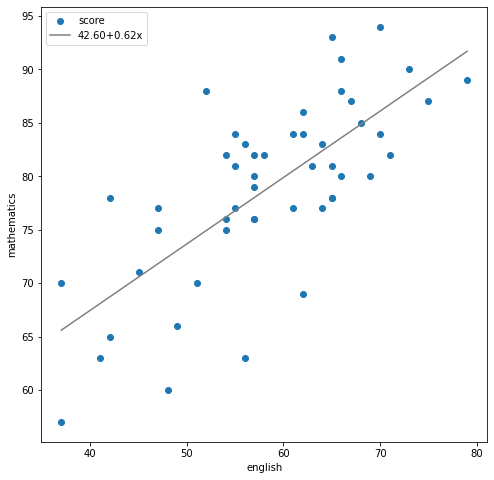

In [45]:
# 계수 구하기
poly_fit = np.polyfit(english_scores,math_scores,1)
# 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(english_scores.min(),english_scores.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(english_scores,math_scores,label='score')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

ax.legend(loc='upper left')

plt.show()

#### 히트맵

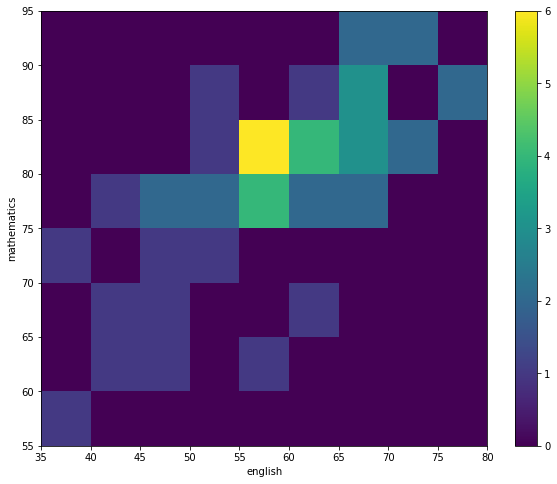

In [46]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
             bins=[9,8], range=[(35,80),(55,95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3],ax=ax)
plt.show()

#### [과제_0823-1] p.52~83 예제 문제 풀기(완)

#### [과제_0823-2] 일차원 데이터를 생성하여 다음을 수행하세요.
- 도수분포표를 만들어 히스토그램으로 시각화하세요
- 상대도수 및 누적상대도수를 도수분포표에 추가하고 히스토그램과 누적상대도수를 시각화하세요


In [9]:
data_my = np.random.randint(100,size=100)
data_my

array([77, 61, 37, 28, 60, 74, 14, 66, 34, 14, 65, 44, 70, 13,  0, 76, 43,
       98, 52, 57, 72, 49, 63, 51, 98, 20, 86, 74, 17, 86, 84, 47, 91, 12,
       50, 59, 65, 77, 52, 79,  9, 20, 24, 31, 41, 76, 60, 89, 92, 48, 64,
        6, 73, 60,  4, 93, 35, 84, 29, 96, 21, 45,  4,  8, 83, 76, 87, 89,
       58,  2,  0, 16, 35, 34, 99, 93, 73, 88, 71, 15, 61, 86, 26, 12, 11,
       73, 62,  9, 67, 98, 15,  7, 10,  6, 44, 50,  3, 10, 52, 68])

In [11]:
freq,_ = np.histogram(data_my, bins=10, range=(0,100))
freq

array([12, 12,  7,  6,  8,  9, 13, 14, 10,  9], dtype=int64)

In [32]:
freq = np.histogram(data_my, bins=10, range=(0,100))
freq

(array([12, 12,  7,  6,  8,  9, 13, 14, 10,  9], dtype=int64),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

<function matplotlib.pyplot.show(close=None, block=None)>

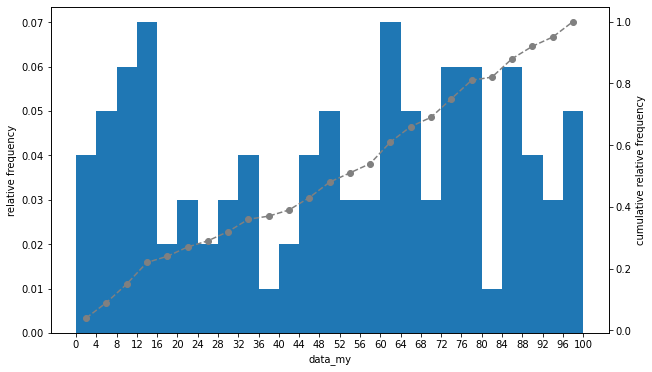

In [13]:
# 상대도수의 히스토그램 , 누적상대도수의 꺾은선 그래프 같이 그리기

fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

weights = np.ones_like(data_my) / len(data_my)
rel_freq,_,_ = ax1.hist(data_my, bins=25, range=(0,100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]

ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')
ax2.grid(visible=False)

ax1.set_xlabel('data_my')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show

#### [과제_0823-3] 이차원 데이터를 생성하여 다음을 수행하세요 
- 공분산 및 상관계수를 구하세요
- 이차원 데이터를 산점도, 히트맵으로 시각화한 후 인사이트를 기술하세요.


In [14]:
diabetes = pd.read_csv('./국가건강검진_혈압혈당데이터.csv')
diabetes

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI
0,1,1,116,78,94,4,16.6
1,1,1,100,60,79,4,22.3
2,1,1,100,60,87,4,21.9
3,1,1,111,70,72,4,20.2
4,1,1,120,80,98,4,20.0
...,...,...,...,...,...,...,...
999995,2,27,120,70,81,2,23.1
999996,2,27,110,70,104,2,27.2
999997,2,27,115,53,110,1,25.2
999998,2,27,120,70,90,2,19.7


In [30]:
# 공분산 행렬, 분산공분산 행렬 cov함수
cov_FBS = np.cov(diabetes.DBP,diabetes.FBS,ddof=0)
cov_FBS

array([[ 95.911,  31.22 ],
       [ 31.22 , 528.14 ]])

In [16]:
# 상관행렬 corrcoef
np.corrcoef(diabetes.BMI,diabetes.SEX)

array([[ 1.   , -0.171],
       [-0.171,  1.   ]])

In [18]:
diabetes.corr()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI
SEX,1.000000,0.085226,-0.168796,-0.190420,-0.101150,-0.004797,-0.170833
BTH_G,0.085226,1.000000,0.275981,0.134484,0.213951,-0.478049,0.088089
SBP,-0.168796,0.275981,1.000000,0.743006,0.186501,-0.310757,0.304383
DBP,-0.190420,0.134484,0.743006,1.000000,0.138717,-0.193525,0.275492
FBS,-0.101150,0.213951,0.186501,0.138717,1.000000,-0.315935,0.173688
DIS,-0.004797,-0.478049,-0.310757,-0.193525,-0.315935,1.000000,-0.200107
BMI,-0.170833,0.088089,0.304383,0.275492,0.173688,-0.200107,1.000000


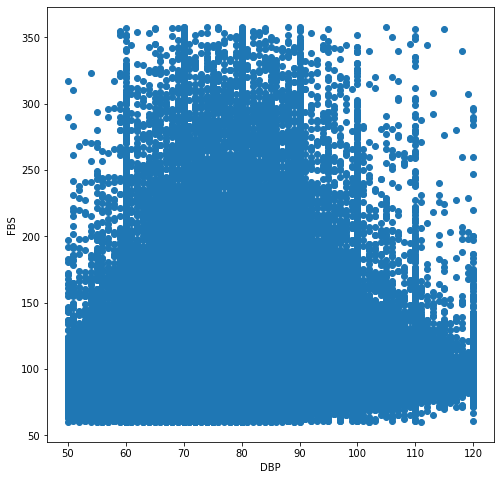

In [29]:
DBP = np.array(diabetes['DBP'])
FBS = np.array(diabetes['FBS'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.scatter(DBP,FBS)
ax.set_xlabel('DBP')
ax.set_ylabel('FBS')

plt.show()

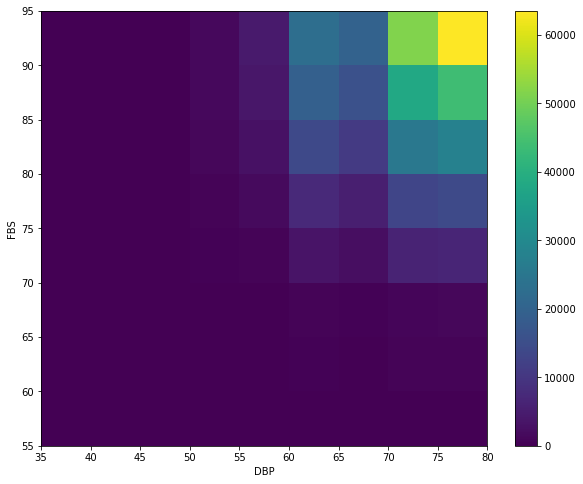

In [31]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(DBP, FBS,
             bins=[9,8], range=[(35,80),(55,95)])
ax.set_xlabel('DBP')
ax.set_ylabel('FBS')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3],ax=ax)
plt.show()

### 앤스컴의 예

In [33]:
anscombe_data = np.load('./ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data

(4, 11, 2)


array([[[10.  ,  8.04],
        [ 8.  ,  6.95],
        [13.  ,  7.58],
        [ 9.  ,  8.81],
        [11.  ,  8.33],
        [14.  ,  9.96],
        [ 6.  ,  7.24],
        [ 4.  ,  4.26],
        [12.  , 10.84],
        [ 7.  ,  4.82],
        [ 5.  ,  5.68]],

       [[10.  ,  9.14],
        [ 8.  ,  8.14],
        [13.  ,  8.74],
        [ 9.  ,  8.77],
        [11.  ,  9.26],
        [14.  ,  8.1 ],
        [ 6.  ,  6.13],
        [ 4.  ,  3.1 ],
        [12.  ,  9.13],
        [ 7.  ,  7.26],
        [ 5.  ,  4.74]],

       [[10.  ,  7.46],
        [ 8.  ,  6.77],
        [13.  , 12.74],
        [ 9.  ,  7.11],
        [11.  ,  7.81],
        [14.  ,  8.84],
        [ 6.  ,  6.08],
        [ 4.  ,  5.39],
        [12.  ,  8.15],
        [ 7.  ,  6.42],
        [ 5.  ,  5.73]],

       [[ 8.  ,  6.58],
        [ 8.  ,  5.76],
        [ 8.  ,  7.71],
        [ 8.  ,  8.84],
        [ 8.  ,  8.47],
        [ 8.  ,  7.04],
        [ 8.  ,  5.25],
        [19.  , 12.5 ],
        [ 

In [36]:
stats_df = pd.DataFrame(index=['X_mean','X_variance','Y_mean',
                              'Y_variance','X&Y_correlation',
                              'X&Y_regression line'])

for i, data in enumerate(anscombe_data):
    dataX = data[:,0]
    dataY = data[:,1]
    poly_fit = np.polyfit(dataX,dataY,1)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
        f'{np.var(dataX):.2f}',
        f'{np.mean(dataY):.2f}',
        f'{np.var(dataY):.2f}',
        f'{np.corrcoef(dataX,dataY)[0,1]:.2f}',
        f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df


,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


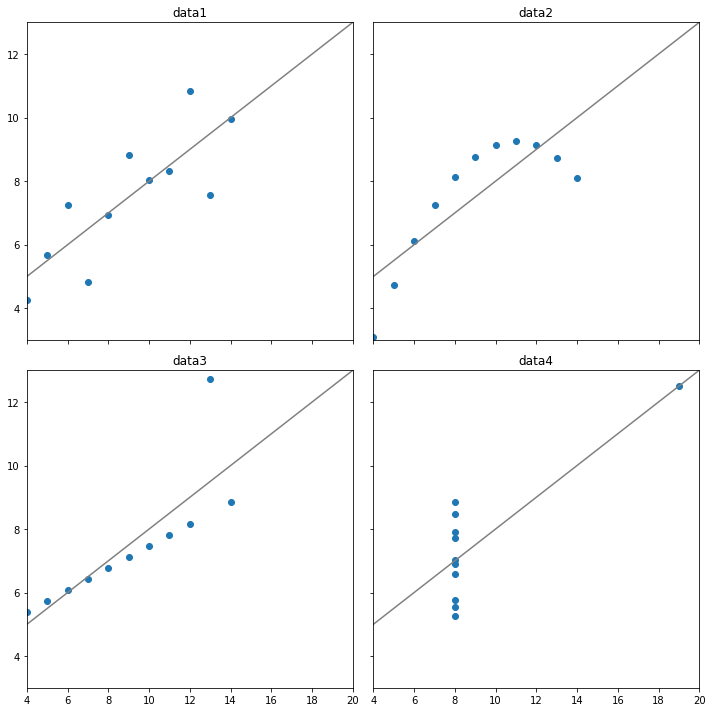

In [37]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10),
                       sharex=True, sharey=True)

xs = np.linspace(0,30,100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1],1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    
    #그리는 영역을 선택
    ax = axes[i//2,i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    
    #타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0],data[:,1])
    ax.plot(xs, ys, color='gray')
    
# 그래프 사이의 간격을 좁힌다
plt.tight_layout()
plt.show()

#### polyfit 함수 사용법 
poly(x,y,차수) 형태로 이용 

In [42]:
x = [1,2,3,4,5,6]
y = [1,3,6,8,11,19]

print(np.polyfit(x,y,1))

#y = 3.314x - 3.6
#걍 n차 방정식 만들어주는.. ... 

[ 3.314 -3.6  ]


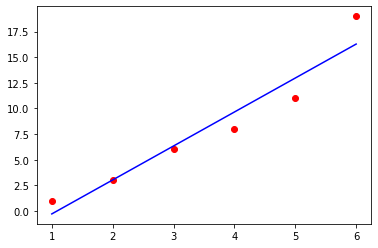

In [43]:
poly = np.polyfit(x,y,1)
y_pred = np.array(x) * poly[0] + poly[1]

plt.plot(x,y_pred, color='b')
plt.scatter(x, y, color = 'r')
plt.show()

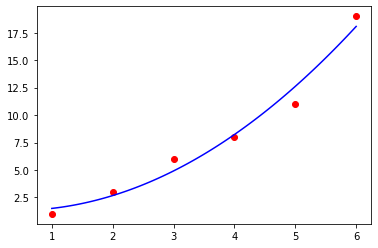

In [44]:
poly = np.polyfit(x, y, 2)
x_line = np.linspace(1,6,100)#곡선을 완만하게그리기위한 linspace 객체 선언
y_pred = x_line**2*poly[0]+x_line*poly[1]+poly[2] #0.53571429x^2 + 0.43571429x + 1.4

plt.plot(x_line, y_pred, color='b')
plt.scatter(x,y,color='r')
plt.show()

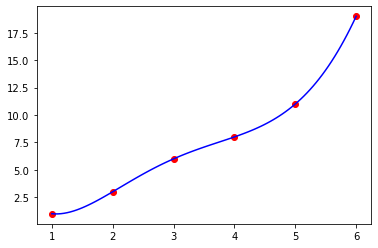

In [45]:
#5차 
poly = np.polyfit(x, y, 5)
x_line = np.linspace(1,6,100)#곡선을 완만하게그리기위한 linspace 객체 선언
y_pred = np.zeros_like(x_line) #예측값을 담을 그릇(모든 값이 0인 배열)
#y_pred = x_line**5*poly[0] + x_line**4*poly[1]+x_line**3*poly[2]+x_line**2*poly[3]+x_line*poly[4]+poly[5] 

for i in range(6):
    y_pred += x_line**(5-i)*poly[i]

plt.plot(x_line, y_pred, color='b')
plt.scatter(x,y,color='r')
plt.show()

#### [과제_0824_1]
p.84~112 코드문제를 모두 풀어보세요.

#### [과제_0824_2]
적절한 데이터를 생성하고 polyfit을 이용하여 2,3차 방정식을 만든 후 산점도 및 회귀식을 시각화하여 그 의미를 해석하세요.

#### [과제_0824_3]
"어떤 모집단에서 표본을 랜덤하게 추출하여 표본평균을 구하면 그 표본평균은 모평균을 중심으로 분포한다."라는 주장을
사례를 만들어서 설득력있게 설명하세요.

 ## 추측통계의 기본

### 모집단과 표본

In [47]:
df = pd.read_csv('./ch2_scores_em.csv')
scores = np.array(df['english'])
scores[:10]

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [50]:
np.random.choice([1,2,3],3)

array([2, 1, 1])

In [54]:
# 중복 없이 랜덤 추출
np.random.choice([1,2,3],3,replace=False)

array([1, 3, 2])

In [55]:
np.random.seed(0)
np.random.choice([1,2,3],3)

array([1, 2, 1])

In [56]:
# 표본 추출 후 평균
np.random.seed(0)
sample = np.random.choice(scores,20)
sample.mean()

54.550

In [57]:
# 모평균
scores.mean()

58.380

In [58]:
for i in range(5):
    sample = np.random.choice(scores,20)
    print(f'{i+1}번째 무작위추출로 얻은 표본평균',sample.mean())

1번째 무작위추출로 얻은 표본평균 59.25
2번째 무작위추출로 얻은 표본평균 55.95
3번째 무작위추출로 얻은 표본평균 61.2
4번째 무작위추출로 얻은 표본평균 60.7
5번째 무작위추출로 얻은 표본평균 54.8


### 확률 모형

#### 확률의 기본

확률모형 : 확률을 사용해 무작위추출 모델링
확률변수 : 그 값이 나올 확률이 결정되어 있는 것
시행 : 확률변수의 결과를 관측하는 것
실현값 : 시행에 의해 관측되는 값
사건 : 시행 결과로 나타날 수 있는 일
근원사건 : 더 세부적으로 분해할 수 없는 사건
상호배반 : 각 사건이 동시에 일어날 수 없다는 뜻

#### 확률분포

In [59]:
# 특정한 눈이 나오기 쉬운 불공정한 주사위
dice = [1,2,3,4,5,6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [60]:
np.random.choice(dice,p=prob)

6

In [61]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([1, 3, 2, 4, 2, 4, 4, 2, 5, 5, 3, 5, 2, 5, 6, 4, 5, 2, 6, 4, 3, 5,
       1, 6, 1, 5, 3, 6, 6, 3, 5, 5, 5, 3, 6, 4, 6, 5, 4, 6, 4, 6, 5, 6,
       5, 6, 5, 6, 5, 4, 5, 1, 4, 5, 4, 5, 4, 2, 4, 5, 5, 5, 5, 5, 4, 6,
       4, 4, 6, 6, 5, 2, 6, 5, 6, 3, 6, 3, 5, 2, 6, 6, 5, 4, 2, 5, 4, 6,
       6, 6, 6, 1, 4, 6, 3, 5, 2, 3, 1, 6])

In [62]:
freq,_ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({'frequency':freq,
             'relative frequency':freq/num_trial},
            index = pd.Index(np.arange(1,7), name='dice'))

,frequency,relative frequency
dice,,
1,6,0.06
2,10,0.10
3,10,0.10
4,19,0.19
5,29,0.29
6,26,0.26


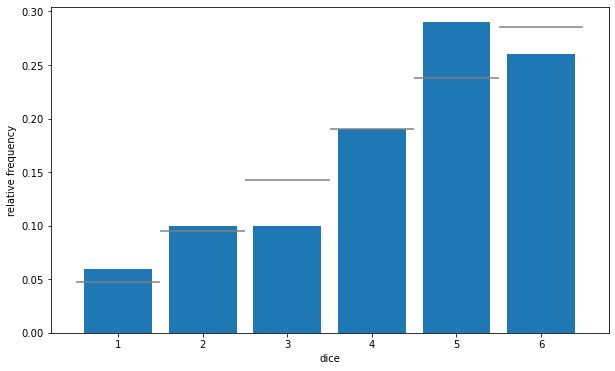

In [65]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob,np.arange(1,7),np.arange(2,8), colors='gray')
# 막대그래프의 [1.5,2.5,...6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5,6.5,6))
# 주사위 눈의 값은 [1,2,3,4,5,6]
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

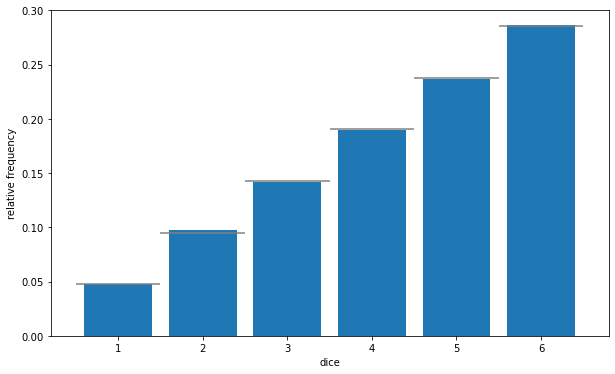

In [66]:
# 시행 횟수를 늘리면 실제의 확률분포와 비슷해진다.
num_trial = 100000
sample = np.random.choice(dice, num_trial, p=prob)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)

# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob,np.arange(1,7),np.arange(2,8), colors='gray')

# 막대그래프의 [1.5,2.5,...6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5,6.5,6))

# 주사위 눈의 값은 [1,2,3,4,5,6]
ax.set_xticklabels(np.arange(1,7))

ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

### 추측통계의 확률

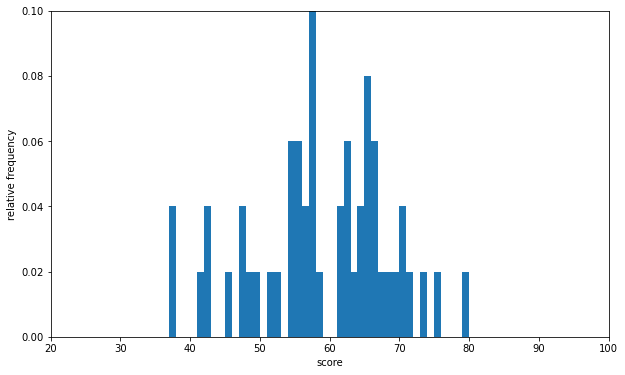

In [75]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0,100), density=True)

ax.set_xlim(20,100)
ax.set_ylim(0,0.1)

ax.set_xlabel('score')
ax.set_ylabel('relative frequency')

plt.show()

In [76]:
np.random.choice(scores)

57

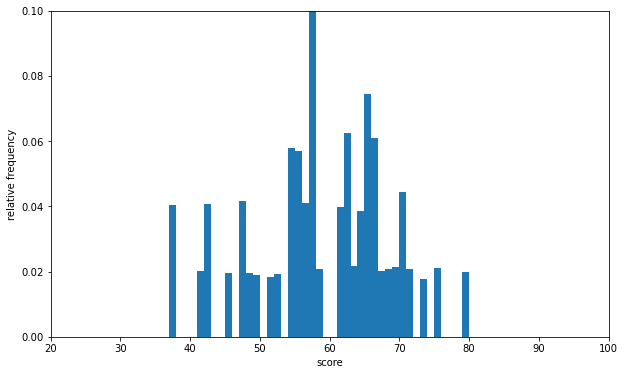

In [78]:
# 표본으로 히스토그램
sample = np.random.choice(scores,10000)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0,100), density=True)

ax.set_xlim(20,100)
ax.set_ylim(0,0.1)

ax.set_xlabel('score')
ax.set_ylabel('relative frequency')

plt.show()

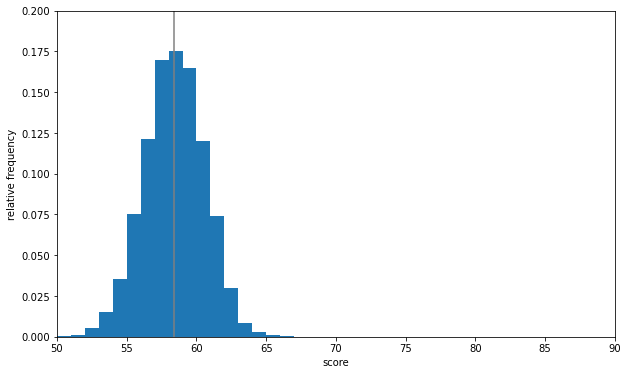

In [82]:
# 표본으로 히스토그램
sample_means = [np.random.choice(scores,20).mean()
               for _ in range(10000)]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0,100), density=True)

# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores),0,1,'gray')

ax.set_xlim(50,90)
ax.set_ylim(0,0.2)

ax.set_xlabel('score')
ax.set_ylabel('relative frequency')

plt.show()